In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling : creates indexed dict with compiled data from files listed
files = ['actions_taken', 'basic_details', 'basis_of_search', 'basis_property_seizure', 'disability', 'evidence_found', 'gender', 'property_seized', 'race', 'reason_for_stop', 'stop_result']

def getFileData( filename ) :
    data = csv.reader(open('Data/' + filename + '.csv'))
    fields = data.__next__()
    rows = {}
    for (index, row) in enumerate(data) :
        items = zip(fields, row)
        item = {}
        for (name, value) in items :
            item[name] = value.strip()
        rows[index] = item
    return rows

def getFileData( filename ) :
    data = csv.reader(open("Data/" + filename + '.csv'))
    fields = data.__next__()
    rows = {}
    for (index, row) in enumerate(data) :
        items = zip(fields, row)
        item = {}
        for (name, value) in items :
            item[name] = value.strip()
        rows[index] = item
    return rows

def getUidDict( files ) :
    uid_dict = {}
    for file in files :
        fileData = getFileData( file )
        for rowIndex in fileData :
            row = fileData[rowIndex]
            stop_id = row['stop_id']
            pid = row['pid']
            uid = stop_id + "_" + pid
            uid_dict[uid] = {}
    for file in files :
        fileData = getFileData( file )
        for rowIndex in fileData :
            row = fileData[rowIndex]
            stop_id = row['stop_id']
            pid = row['pid']
            uid = stop_id + "_" + pid
            for field in row :
                uid_dict[uid][field] = row[field]
    return uid_dict

def getIndexedDict( uid_dict ) :
    dict = {}
    for (index, uid) in enumerate( uid_dict ) :
        dict[index] = uid_dict[ uid ]
        dict[index]['uid'] = uid
    return dict


data = pd.DataFrame(getIndexedDict( getUidDict(files)))
data = data.T


# ## 1.3 Take a look at the data

# In[4]:


data.head(7).T


# ## 1.4 All the rows

# In[5]:


# show basic infomation of data
data.info()


# ## 2.1 Brief introduction to data
# 1. count  - how many rows in the data
# 2. unique - number of different values
# 3. top    - largest value
# 4. freq   - count of top value

df = data.copy(deep=True)
df = df.drop(["agency","ori"],axis = 1)
print("data.columns:" + str(len(data.columns)))
print("df.columns:" + str(len(df.columns)))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 89470 entries, 0 to 89469
Data columns (total 49 columns):
action                          89470 non-null object
agency                          89470 non-null object
assignment                      89470 non-null object
basis_for_search                89470 non-null object
basis_for_search_explanation    89470 non-null object
basisforpropertyseizure         89470 non-null object
beat                            89470 non-null object
beat_name                       89470 non-null object
block                           89470 non-null object
cityname                        89470 non-null object
code                            89470 non-null object
consented                       89470 non-null object
contraband                      89470 non-null object
disability                      89470 non-null object
exp_years                       89470 non-null object
gend                            89470 non-null object
gend_nc                    

In [2]:
df = data.copy(deep=True)

In [3]:
df.T;

## A1 Relationship between age and crime
### 1.1 age distribution

In [4]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [5]:
df = data['perceived_age'].copy(deep=True)

In [6]:
#convert to int
for i in range(len(df)):
    df.at[i] = int(df[i])
df.describe()

count     89470
unique      105
top          30
freq      12594
Name: perceived_age, dtype: int64

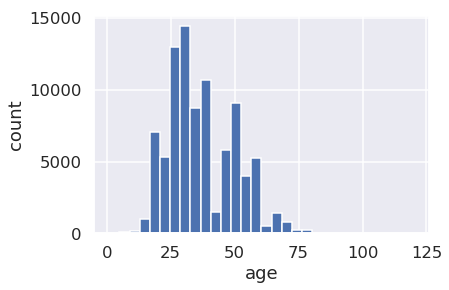

In [7]:
plt.figure();
df.plot.hist(bins = 30);
plt.xlabel('age');
plt.ylabel('count');

### 1.2 age - crime type
We split age into different groups
1. 19- , 1
1. 20-29 , 2
1. 30-39 , 3
1. 40-49 , 4
1. 50+ , 5

In [8]:
stop_words = {'i', 'me', 'am', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

In [9]:
wordDic = dict()

def sentence2dic(s):
    
    s = s.lower()
    s = s.replace('.','')
    s = s.replace('\'','')
    s = s.replace('/','')
    s = s.replace('\\','')
    s = s.replace('*','')
    words = s.split()
    
    for word in words:
        if word in stop_words:
            continue
        if '0' in word:
            continue
        if '1' in word:
            continue
        if '2' in word:
            continue
        if '3' in word:
            continue
        if '4' in word:
            continue
        if '5' in word:
            continue
        if '6' in word:
            continue
        if '7' in word:
            continue
        if '8' in word:
            continue
        if '9' in word:
            continue
            
        if word in wordDic:
            wordDic[word]+=1
        else :
            wordDic[word] = 1

def cleanStr(s):
    s = s.lower()
    s = s.replace('/','')
    s = s.replace('\\','')
    s = s.replace('\'','')
    s = s.replace('#','')
    s = s.replace('.','')
    s = s.replace(',','')
    s = s.replace('*','')
    
    return s
    

In [10]:
df = data.copy(deep=True)
df['reason_for_stop_explanation'] = df['reason_for_stop_explanation'].apply(cleanStr)

In [11]:
pd.DataFrame(df['reason_for_stop'].value_counts())

,reason_for_stop
Reasonable Suspicion,42492
Traffic Violation,40405
Consensual Encounter resulting in a search,2190
Investigation to determine whether the person was truant,1917
Known to be on Parole / Probation / PRCS / Mandatory Supervision,1430
Knowledge of outstanding arrest warrant/wanted person,1030
"Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7",3
Determine whether the student violated school policy,3


In [12]:
pd.DataFrame(df['reason_for_stop_code_text'].value_counts());

In [13]:
df_reasonable = df[df['reason_for_stop'] == 'Reasonable Suspicion']
len(df_reasonable)

42492

In [14]:
df_reasonable = df[df['reason_for_stop'] == 'Reasonable Suspicion'].copy(deep=True);
df_reasonable['reason_for_stop_code_text'].value_counts();

In [15]:
'''
CONFUSED:
COMMUNITY CARETAKING

'''
df_reasonable = df[df['reason_for_stop'] == 'Reasonable Suspicion'].copy(deep=True)
def categorizeType_reasonable(s):
    violationDic = {
        'lodge without consent' : ['lodge w'],
        'local ordinance violation' : ['local ordinance'],
        'alcohol' : ['alcohol'],
        'drugs' : ['drug','CNTL SUB','CONTROLLED SUBSTANCE','MARIJUANA'],
        'fight / battery' : ['fight','battery','assult','hit'],
        'trespassing' : ['trespas','NO LOITERING','LOITER/ETC PRIVATE PROP'],
        'burglary / theft / robbery' : ['burglary','theft','robbery','shoplifting','THFT','LOST PROP',' TAKE VEH W/O OWNER CONSNT'],
        'noise' : ['noise'],
        'fail to pay for transit' : ['FAIL PAY:PUB TRANSIT SYS'],
        'deadly weapon / terrorize' : ['F/ARM','FIREARM','shooting','TERRORIZE'],
        'murder / kidnapping' : ['murder','kidnapping'],
        'vandalism' : ['VANDALISM'],
        'spouse question' : ['spouse','SPOUS','cohab'],
        'trivial' : ['smok','SKATEBOARD','jaywalking','OFFENSIVE WORDS','SCOOTR','speed','drive','BIKE','highway'],
        'prostitution' : ['PROSTITUTION'],
        'caretaking' : ['caretak'],
        'vehicle robbery' : ['TAMPER WITH VEHICLE']
    }
    
    for key in violationDic:
        for word in violationDic[key]:
            if word.upper() in s:
                return '*'+key+'*'
    
#     return '*others*'
    return '*others*'

df_reasonable['crime_type'] = df_reasonable['reason_for_stop_code_text'].apply(categorizeType_reasonable)

pd.DataFrame(df_reasonable['crime_type'].value_counts())


,crime_type
*local ordinance violation*,6510
*others*,5552
*trespassing*,4738
*alcohol*,4268
*lodge without consent*,4045
*fight / battery*,3148
*burglary / theft / robbery*,2814
*drugs*,2427
*caretaking*,1619
*trivial*,1585


## Here I generalize some classes for traffic violation
1. speeding
2. resictration violation
3. helmet
4. phone / text
5. traffic sign
6. plate
7. turn
8. container
9. scooter
10. lane


In [16]:
df_traffic = df[df['reason_for_stop'] == 'Traffic Violation']
len(df_traffic)
# pd.DataFrame(df_traffic['reason_for_stop_explanation'].value_counts())

40405

In [17]:
def categorizeType(s):
    violationDic = {
        'speeding' : ['speed','fast'],
        'expire or fake liscence' : ['exp','reg','lisence'],
        'helmet' : ['helmet'],
        'phone' : ['phone','text','call','wireless','cell','mobile'],
        'sign' : ['sign'],
        'plate' : ['plate'],
        'turn' : ['turn'],
        'container' : ['container','open'],
        'scooter' : ['scooter'],
        'bike' : ['bike'],
        'sidewalk' : ['sidewalk','side'],
        'lane' : ['lane','wrong way','line','yellow'],
        'tinted window' : ['tint'],
        'red light' : ['red'],
        'traffic jam' : ['busy','jam','traffic'],
        'jaywalking' : ['jaywalking'],
        'seatbelt' : ['seatbelt','belt'],
        'stopping violation' : ['stop','tstop','lodging'],
        'unsafe movement' : ['unsafe','reckless'],
        'driving equipment violaiton' : ['equip'],
        'alcohol' : ['alchol','wine' ,'drink' ,'drunk','alcohol'],
        'highway voilation' : ['hwy','high'],
        'passenger' : ['passenger'],
        'sleep' : ['island','sleep'],
        'hands free' : ['hand','off'],
        'collision' : ['collis' ,'hit' , 'crash'],
        'car problem' : ['crack' ,'broken','light','noise','loud']
    }
    
    for key in violationDic:
        for word in violationDic[key]:
            if word in s:
                return '*'+key+'*'
    
    return '*others*'

df_traffic['crime_type'] = df_traffic['reason_for_stop_explanation'].apply(categorizeType)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
#pd.DataFrame(df_traffic['crime_type'].value_counts())

In [19]:
df_traffic = df_traffic.drop(["agency", "beat", "beat_name", "consented", "basisforpropertyseizure", "disability", "isschool","school_name", "isstudent", "type_of_property_seized"], axis=1)
df_traffic = df_traffic.set_index("stop_id")

In [20]:
df_reasonable = df_reasonable.drop(["agency", "beat", "beat_name", "consented", "basisforpropertyseizure", "disability", "isschool","school_name", "isstudent", "type_of_property_seized"], axis=1)
df_reasonable = df_reasonable.set_index("stop_id")

In [21]:
df_reasonable_loc = df_reasonable[["block", "street", "cityname", "intersection", "highway_exit"]]
df_traffic_loc = df_traffic[["block", "street", "cityname", "intersection", "highway_exit"]]

In [37]:
f= open("reasonable_loc"+".csv","w+")
for index, row in df_reasonable_loc.iterrows() :
    if (row["street"] != "" and row["intersection"] != "") :
        try:
            f.write(str(index) + '001,' + row['street'] + ' and ' + row['intersection'] + ',' + row['cityname'] + ',CA,\n')
            f.write(str(index) + '002,' + row['street'] + ' and ' + row['intersection'] + ',' + 'La Jolla' + ',CA,\n')
            f.write(str(index) + '003,' + row['street'] + ' and ' + row['intersection'] + ',' + 'El Cajon' + ',CA,\n')
        except:
            print("Error on line ", index)
    elif (row["block"] != "" and row["street"] != "") :
        try:
            f.write(str(index) + '001,' + row['block'] + ' ' + row['street'] + ',' + row['cityname'] + ',CA,\n')
            f.write(str(index) + '002,' + row['block'] + ' ' + row['street'] + ',' + 'La Jolla' + ',CA,\n')
            f.write(str(index) + '003,' + row['block'] + ' ' + row['street'] + ',' + 'El Cajon' + ',CA,\n')
        except:
            print("Error on line ", index)
f.close()

In [38]:
f= open("traffic_loc"+".csv","w+")
for index, row in df_traffic.iterrows() :
    if (row["street"] != "" and row["intersection"] != "") :
        try:
            f.write(str(index) + '001,' + row['street'] + ' and ' + row['intersection'] + ',' + row['cityname'] + ',CA,\n')
            f.write(str(index) + '002,' + row['street'] + ' and ' + row['intersection'] + ',' + 'La Jolla' + ',CA,\n')
            f.write(str(index) + '003,' + row['street'] + ' and ' + row['intersection'] + ',' + 'El Cajon' + ',CA,\n')
        except:
            print("Error on line ", index)
    elif (row["block"] != "" and row["street"] != "") :
        try:
            f.write(str(index) + '001,' + row['block'] + ' ' + row['street'] + ',' + row['cityname'] + ',CA,\n')
            f.write(str(index) + '002,' + row['block'] + ' ' + row['street'] + ',' + 'La Jolla' + ',CA,\n')
            f.write(str(index) + '003,' + row['block'] + ' ' + row['street'] + ',' + 'El Cajon' + ',CA,\n')
        except:
            print("Error on line ", index)
f.close()

In [ ]:
export_traffic_csv = df_traffic.to_csv (r'traffic.csv', header=True) #Don't forget to add '.csv' at the end of the path
export_reasonable_csv = df_reasonable.to_csv (r'reasonable.csv', header=True) #Don't forget to add '.csv' at the end of the path
